In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

df = pd.read_csv('titanic.csv')
df[::6]

,PassengerId,Name,PClass,Age,Sex,Survived
0,1.0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1.0
6,7.0,"Andrews, Miss Kornelia Theodosia",1st,63.0,female,1.0
12,13.0,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1.0
18,19.0,"Beckwith, Mr Richard Leonard",1st,37.0,male,1.0
24,25.0,"Bjornstrm-Steffansson, Mr Mauritz Hakan",1st,28.0,male,1.0
...,...,...,...,...,...,...
1278,1279.0,"Zakarian, Mr Maprieder",3rd,26.0,male,0.0
1284,NaN,NaN,NaN,NaN,NaN,NaN
1290,NaN,NaN,NaN,NaN,NaN,NaN
1296,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(len(df))
    df_dropped = df.dropna(subset=['Survived'])
len(df_dropped)

1307


1282

In [10]:
len(df.dropna())

734

In [3]:
df_dropped[::6]

,PassengerId,Name,PClass,Age,Sex,Survived
0,1.0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1.0
6,7.0,"Andrews, Miss Kornelia Theodosia",1st,63.0,female,1.0
12,13.0,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1.0
18,19.0,"Beckwith, Mr Richard Leonard",1st,37.0,male,1.0
24,25.0,"Bjornstrm-Steffansson, Mr Mauritz Hakan",1st,28.0,male,1.0
...,...,...,...,...,...,...
1254,1255.0,"Vartunian, Mr David",3rd,22.0,male,1.0
1260,1261.0,"Ware, Mr Frederick",3rd,NaN,male,0.0
1266,1267.0,"Widegren, Mr Charles Peter",3rd,51.0,male,0.0
1272,1273.0,"Williams, Mr Leslie",3rd,28.0,male,0.0


In [16]:
features = ['PClass', 'Age', 'Sex']
X = df_dropped[features]
y = df_dropped['Survived']

In [25]:
numeric_features = ['Age']
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
categorical_features = ['PClass', 'Sex']

preprocessor = ColumnTransformer(
    [
        ("num", numeric_transformer, numeric_features),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore"),
            categorical_features,
        ),
    ],
    verbose_feature_names_out=False,
)

[0.8528428093645485, 0.855072463768116, 0.8573021181716833, 0.8461538461538461, 0.8483835005574136, 0.842809364548495, 0.8450390189520625, 0.8461538461538461, 0.8372352285395763, 0.8383500557413601, 0.8405797101449275, 0.8383500557413601, 0.8394648829431438, 0.830546265328874, 0.8361204013377926, 0.8316610925306578, 0.830546265328874, 0.830546265328874, 0.8338907469342252, 0.8316610925306578, 0.8361204013377926, 0.8294314381270903, 0.830546265328874, 0.8338907469342252, 0.8294314381270903, 0.8294314381270903, 0.8283166109253066, 0.8316610925306578, 0.8327759197324415, 0.835005574136009, 0.8327759197324415, 0.8361204013377926, 0.8361204013377926, 0.8316610925306578, 0.8327759197324415, 0.8316610925306578, 0.8294314381270903, 0.8283166109253066, 0.8249721293199554, 0.8283166109253066, 0.8216276477146043, 0.822742474916388, 0.8249721293199554, 0.822742474916388, 0.822742474916388, 0.8216276477146043, 0.822742474916388, 0.822742474916388, 0.822742474916388, 0.8205128205128205, 0.8205128205

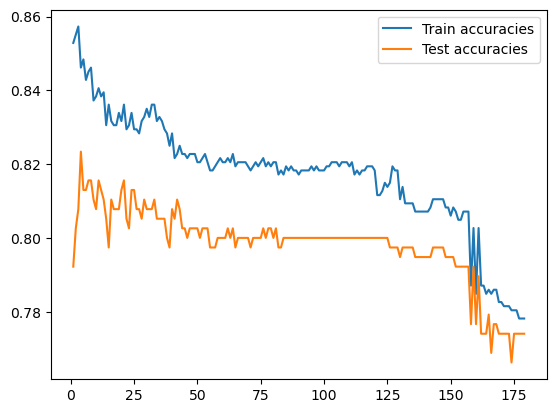

In [26]:
from sklearn import neighbors 
import warnings
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
Ks = np.arange(1, round(0.2*len(X_train) + 1))
accuracies_train=[]
accuracies_test = []
for k in Ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    model = make_pipeline(preprocessor, knn)
    model.fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracies_train.append(accuracy_train)
    accuracy_test = model.score(X_test, y_test)
    accuracies_test.append(accuracy_test)

print(accuracies_train)
print(accuracies_test)
print()
plt.plot(Ks, accuracies_train, label = 'Train accuracies')
plt.plot(Ks, accuracies_test, label = 'Test accuracies')
plt.legend()
plt.show()

In [27]:
k = 4
knn = KNeighborsClassifier(n_neighbors=k)
model = make_pipeline(preprocessor, knn)
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PClass', 'Sex'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])

In [28]:
print(model.score(X_test, y_test))

0.8233766233766234


In [9]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8233766233766234